In [121]:
df = pd.read_csv('hotel_bookings.csv')

In [122]:
# Converting the 'arrival_date_month' column to a numerical value
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month

In [123]:
# Converting the 'arrival_date' column to a datetime object
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].rename(columns={
    'arrival_date_year': 'year',
    'arrival_date_month': 'month',
    'arrival_date_day_of_month': 'day'
}))

In [132]:
df.arrival_date

,arrival_date
3,2015-07-01
4,2015-07-01
5,2015-07-01
7,2015-07-01
8,2015-07-01
...,...
119385,2017-08-30
119386,2017-08-31
119387,2017-08-31
119388,2017-08-31


In [125]:
# Removing rows with missing values
df = df[df['meal']!="Undefined"]
df = df[df['distribution_channel']!= "Undefined"]
df = df[pd.notna(df['agent'])]
df = df[pd.notna(df['country'])]

In [126]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [127]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [130]:
# Creating a new column 'check_out_date' that contains the date when the customer checks out
df['check_out_date'] = df['arrival_date'] + pd.to_timedelta(df['stays_in_weekend_nights'] + df['stays_in_week_nights'], unit='D')

# Calculating the total number of rooms occupied for each hotel type
hotel_types = df['hotel'].unique()
for hotel_type in hotel_types:
    hotel_df = df[df['hotel'] == hotel_type]
    date_range = pd.date_range(start=hotel_df['arrival_date'].min(), end=hotel_df['check_out_date'].max())
    total_rooms_occupied = pd.DataFrame(date_range, columns=['date'])
    total_rooms_occupied['total_rooms_occupied'] = 0

    for _, row in hotel_df.iterrows():
        mask = (total_rooms_occupied['date'] >= row['arrival_date']) & (total_rooms_occupied['date'] < row['check_out_date'])
        total_rooms_occupied.loc[mask, 'total_rooms_occupied'] += 1

    print(f"Total rooms occupied per day for {hotel_type}:")
    print(total_rooms_occupied)

Total rooms occupied per day for Resort Hotel:
          date  total_rooms_occupied
0   2015-07-01                    32
1   2015-07-02                    69
2   2015-07-03                   102
3   2015-07-04                   136
4   2015-07-05                   141
..         ...                   ...
802 2017-09-10                     4
803 2017-09-11                     3
804 2017-09-12                     2
805 2017-09-13                     2
806 2017-09-14                     0

[807 rows x 2 columns]
Total rooms occupied per day for City Hotel:
          date  total_rooms_occupied
0   2015-07-01                    79
1   2015-07-02                   128
2   2015-07-03                    71
3   2015-07-04                    68
4   2015-07-05                    57
..         ...                   ...
799 2017-09-07                     2
800 2017-09-08                     2
801 2017-09-09                     1
802 2017-09-10                     1
803 2017-09-11                   

In [148]:
# Creating a new column 'check_out_date' which is the sum of 'arrival_date' and the number of days the customer stayed
df['check_out_date'] = df['arrival_date'] + pd.to_timedelta(df['stays_in_weekend_nights'] + df['stays_in_week_nights'], unit='D')

# Getting the unique hotel types
hotel_types = df['hotel'].unique()
hotel_a_total_rooms_occupied = None
hotel_b_total_rooms_occupied = None

# Calculating the total rooms occupied per day for each hotel type
for hotel_type in hotel_types:
    hotel_df = df[df['hotel'] == hotel_type]
    date_range = pd.date_range(start=hotel_df['arrival_date'].min(), end=hotel_df['check_out_date'].max())
    total_rooms_occupied = pd.DataFrame(date_range, columns=['date'])
    total_rooms_occupied['total_rooms_occupied'] = 0

    for _, row in hotel_df.iterrows():
        mask = (total_rooms_occupied['date'] >= row['arrival_date']) & (total_rooms_occupied['date'] < row['check_out_date'])
        total_rooms_occupied.loc[mask, 'total_rooms_occupied'] += 1

    print(f"Total rooms occupied per day for {hotel_type}:")
    print(total_rooms_occupied)

    if hotel_type == hotel_types[0]:
        hotel_a_total_rooms_occupied = total_rooms_occupied
    elif hotel_type == hotel_types[1]:
        hotel_b_total_rooms_occupied = total_rooms_occupied

# Merging the total rooms occupied data with the original dataframe
hotel_a_df = df[df['hotel'] == hotel_types[0]].copy()
hotel_b_df = df[df['hotel'] == hotel_types[1]].copy()

# Merging the total rooms occupied data with the original dataframe
hotel_a_df['total_rooms_occupied'] = hotel_a_df.apply(lambda row: hotel_a_total_rooms_occupied.loc[(hotel_a_total_rooms_occupied['date'] >= row['arrival_date']) & (hotel_a_total_rooms_occupied['date'] < row['check_out_date']), 'total_rooms_occupied'].max(), axis=1)
hotel_b_df['total_rooms_occupied'] = hotel_b_df.apply(lambda row: hotel_b_total_rooms_occupied.loc[(hotel_b_total_rooms_occupied['date'] >= row['arrival_date']) & (hotel_b_total_rooms_occupied['date'] < row['check_out_date']), 'total_rooms_occupied'].max(), axis=1)

Total rooms occupied per day for Resort Hotel:
          date  total_rooms_occupied
0   2015-07-01                    32
1   2015-07-02                    69
2   2015-07-03                   102
3   2015-07-04                   136
4   2015-07-05                   141
..         ...                   ...
802 2017-09-10                     4
803 2017-09-11                     3
804 2017-09-12                     2
805 2017-09-13                     2
806 2017-09-14                     0

[807 rows x 2 columns]
Total rooms occupied per day for City Hotel:
          date  total_rooms_occupied
0   2015-07-01                    79
1   2015-07-02                   128
2   2015-07-03                    71
3   2015-07-04                    68
4   2015-07-05                    57
..         ...                   ...
799 2017-09-07                     2
800 2017-09-08                     2
801 2017-09-09                     1
802 2017-09-10                     1
803 2017-09-11                   

In [ ]:
hotel_a_df.to_csv('hotel_a.csv', index=False)
hotel_b_df.to_csv('hotel_b.csv', index=False)

In [4]:
import pandas as pd
hotel_a_df = pd.read_csv('hotel_a.csv')
hotel_b_df = pd.read_csv('hotel_b.csv')

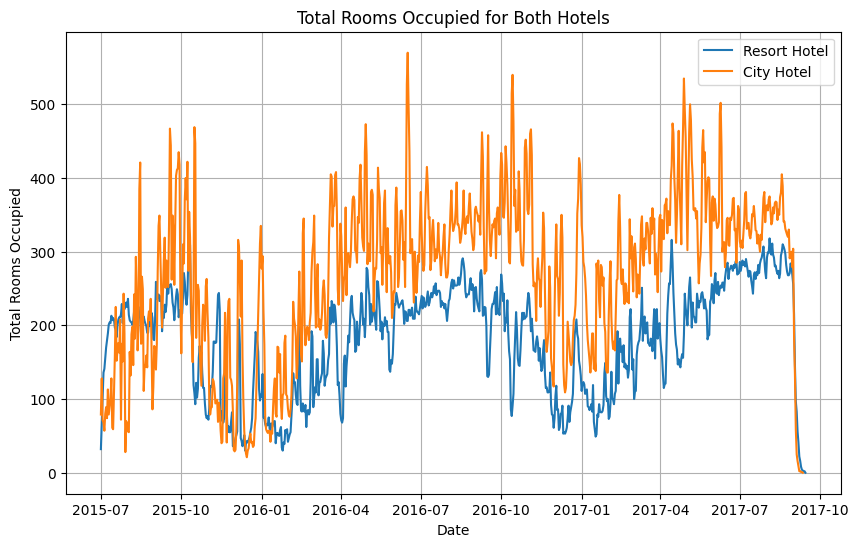

In [137]:
import matplotlib.pyplot as plt

# Plotting the total rooms occupied for each hotel
plt.figure(figsize=(10, 6))
for hotel_type in hotel_types:
    hotel_df = df[df['hotel'] == hotel_type]
    date_range = pd.date_range(start=hotel_df['arrival_date'].min(), end=hotel_df['check_out_date'].max())
    total_rooms_occupied = pd.DataFrame(date_range, columns=['date'])
    total_rooms_occupied['total_rooms_occupied'] = 0

    for _, row in hotel_df.iterrows():
        mask = (total_rooms_occupied['date'] >= row['arrival_date']) & (total_rooms_occupied['date'] < row['check_out_date'])
        total_rooms_occupied.loc[mask, 'total_rooms_occupied'] += 1

    plt.plot(total_rooms_occupied['date'], total_rooms_occupied['total_rooms_occupied'], label=hotel_type)

plt.xlabel('Date')
plt.ylabel('Total Rooms Occupied')
plt.title('Total Rooms Occupied for Both Hotels')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
hotel_a_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'check_out_date', 'total_rooms_occupied'],
      dtype='object')

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Select relevant features for segmentation in hotel_a_df
segmentation_features_a = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'adr', 'total_of_special_requests']

# 2) Drop rows with missing values in these features
hotel_a_df = hotel_a_df.dropna(subset=segmentation_features_a)

# 3) Standardize the feature values
scaler = StandardScaler()
X_scaled_a = scaler.fit_transform(hotel_a_df[segmentation_features_a])

# 4) Use the KMeans clustering algorithm for segmentation (n_clusters = 5)
kmeans_a = KMeans(n_clusters=5, random_state=42)
hotel_a_df['customer_segment'] = kmeans_a.fit_predict(X_scaled_a)
# 5) Analyze and visualize the segments for hotel_a_df

numeric_columns_a = hotel_a_df.select_dtypes(include=['float64', 'int64']).columns

# Grouping by customer_segment and calculate mean for numeric columns only
print(hotel_a_df.groupby('customer_segment')[numeric_columns_a].mean())


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Select relevant features for segmentation in hotel_b_df
segmentation_features_b = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'adr', 'total_of_special_requests']

# 2) Drop rows with missing values in these features
hotel_b_df = hotel_b_df.dropna(subset=segmentation_features_b)

# 3) Standardize the feature values
scaler = StandardScaler()
X_scaled_b = scaler.fit_transform(hotel_b_df[segmentation_features_b])

# 4) Use the KMeans clustering algorithm for segmentation (n_clusters = 5)
kmeans_b = KMeans(n_clusters=5, random_state=42)
hotel_b_df['customer_segment'] = kmeans_b.fit_predict(X_scaled_b)
# 5) Analyze and visualize the segments for hotel_b_df

# Selecting only numeric columns to calculate the mean
numeric_columns_b = hotel_b_df.select_dtypes(include=['float64', 'int64']).columns

In [14]:
hotel_a_df.customer_segment.unique()

array([2, 0, 4, 1, 3], dtype=int32)

In [15]:
hotel_a_df.to_csv('hotel_a_df_cs.csv')
hotel_b_df.to_csv('hotel_b_df_cs.csv')

In [17]:
# Converting to csv to analyze manually
hotel_a_df.groupby('customer_segment')[numeric_columns_a].mean().to_csv('a_cs.csv')
hotel_b_df.groupby('customer_segment')[numeric_columns_b].mean().to_csv('b_cs.csv')

By Analyzing the Clusters Manually

By analyzing for hotel_a
1. Cluster 0: Long-Lead Cancellers
2. Cluster 1: Last-Minute Travelers
3. Cluster 2: High-Spending Family Bookings
4. Cluster 3: Moderate Budget Leisure Travelers
5. Cluster 4: Family-Oriented Short-Stay Bookers

By analyzing for hotel_b
1. Cluster 0: Moderate Lead, Moderate Cancellation Couples
2. Cluster 1: Long-Lead High Cancellers
3. Cluster 2: Short-Lead Budget Travelers
4. Cluster 3: Moderate Budget Leisure Travelers
5. Cluster 4: High-Spending Family Bookings